<a href="https://colab.research.google.com/github/Sidhirajuthanuja/Skill-craft/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9 non-null      object 
 1   time            9 non-null      object 
 2   latitude        9 non-null      float64
 3   longitude       9 non-null      float64
 4   severity        9 non-null      int64  
 5   weather         9 non-null      object 
 6   road_condition  9 non-null      object 
 7   temperature     9 non-null      int64  
 8   visibility      9 non-null      int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 776.0+ bytes
None
         date   time  latitude  longitude  severity weather road_condition  \
0  2024-01-01  08:30   34.0522  -118.2437         3   Clear            Dry   
1  2024-01-01  17:45   34.0522  -118.2437         2    Rain            Wet   
2  2024-01-02  13:15   34.0522  -118.2437         1     Fog          Foggy   
3  2024-01-02  20:30 

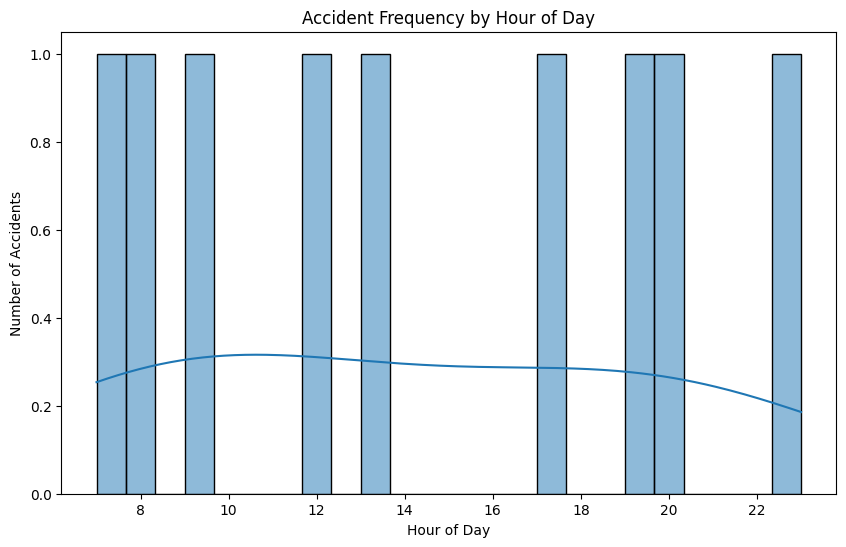

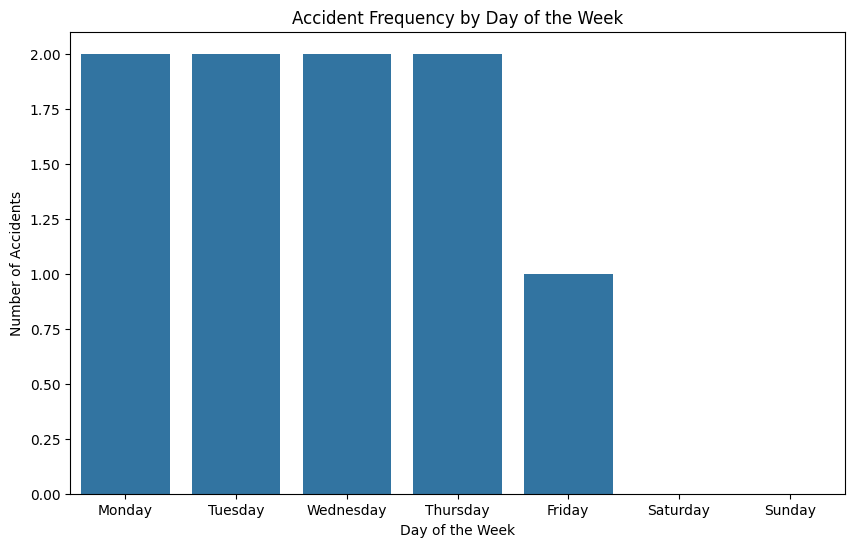

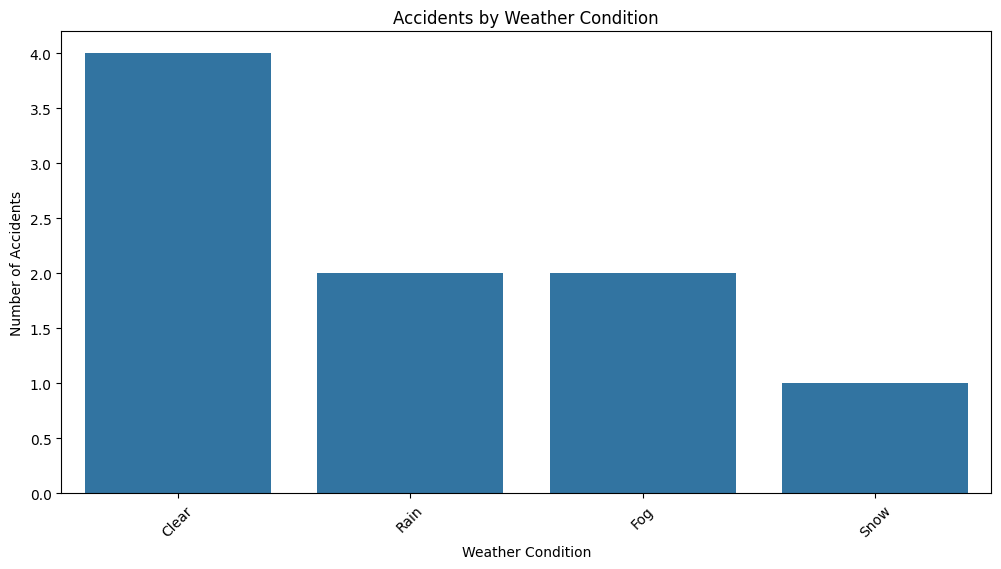

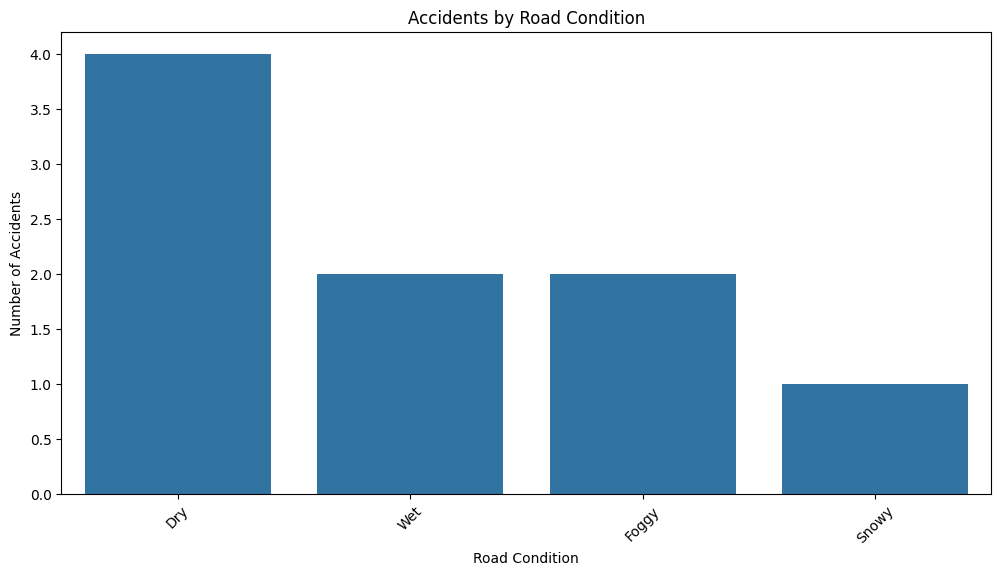

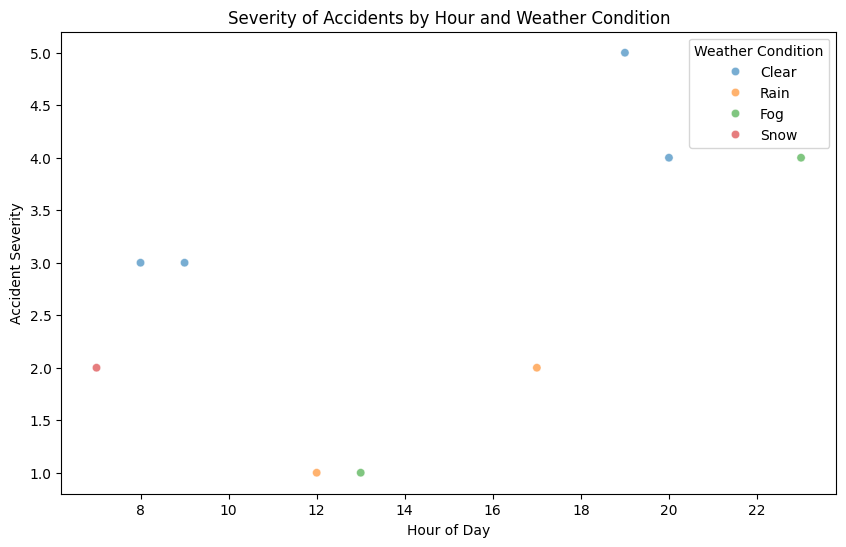

Heatmap saved as 'accident_hotspots.html'


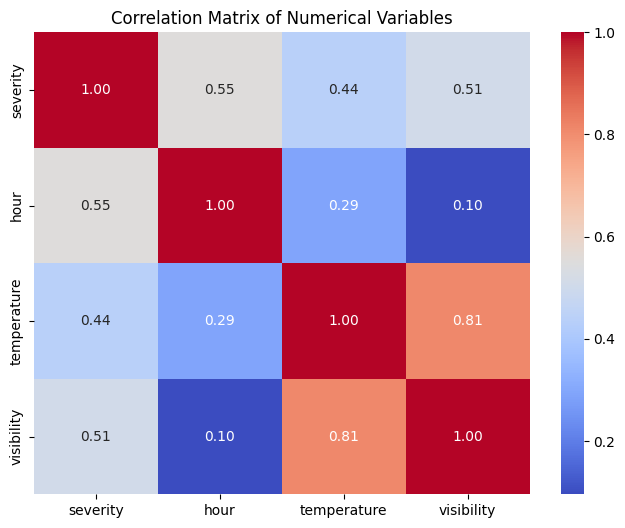

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np

# Load the dataset
# Replace 'accidents.csv' with the actual path to your accident dataset
df = pd.read_csv('/content/accident.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

# Convert date and time columns to datetime format if needed
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Initial exploration
print("Unique values in road conditions:", df['road_condition'].unique())
print("Unique values in weather conditions:", df['weather'].unique())

# 1. Temporal Analysis
# Plot accident frequency by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Accident Frequency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

# Plot accident frequency by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accident Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()

# 2. Analysis by Weather and Road Conditions
# Accidents by weather condition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

# Accidents by road condition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='road_condition', order=df['road_condition'].value_counts().index)
plt.title("Accidents by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

# 3. Severity Analysis
# Scatter plot for severity vs. time of day with hue for weather condition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hour', y='severity', hue='weather', alpha=0.6)
plt.title("Severity of Accidents by Hour and Weather Condition")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Severity")
plt.legend(title='Weather Condition')
plt.show()

# 4. Mapping Accident Hotspots
# Ensure dataset has latitude and longitude columns for mapping
df = df.dropna(subset=['latitude', 'longitude'])  # Drop rows without location data

# Initialize a Folium map centered on the average location
center_lat, center_long = df['latitude'].mean(), df['longitude'].mean()
accident_map = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Add a heatmap layer
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map as HTML file
accident_map.save("accident_hotspots.html")
print("Heatmap saved as 'accident_hotspots.html'")

# 5. Additional Analysis
# Correlation heatmap for selected numerical columns
numerical_cols = ['severity', 'hour', 'temperature', 'visibility']  # Modify based on available columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()
